In [9]:
from google.colab import drive
import sys
import os

drive.mount('/content/drive')

# Personalized path to your project directory
path = '/content/drive/MyDrive/cod/LEA3_helath' # Replace with your actual path

# Add the path to sys.path
sys.path.append(path)
os.chdir(path)

os.curdir



'.'

In [12]:
import numpy as np
import joblib ### para cargar array

########Paquetes para NN #########

from sklearn import metrics ### para analizar modelo
from sklearn.ensemble import RandomForestClassifier  ### para analizar modelo
import pandas as pd

from sklearn import tree
import tensorflow as tf


import cv2 ### para leer imagenes jpeg
### pip install opencv-python

from matplotlib import pyplot as plt #


In [10]:

x_train = joblib.load('salidas/x_train.pkl')
y_train = joblib.load('salidas/y_train.pkl')
x_test = joblib.load('salidas/x_test.pkl')
y_test = joblib.load('salidas/y_test.pkl')

In [11]:
############################################################
################ Preprocesamiento  para modelos Shallow learning##############
############################################################



##### convertir a 1 d array ############
x_train2=x_train.reshape(5216,30000)
x_test2=x_test.reshape(624, 30000)
x_train2.shape
x_test2.shape

x_train2[1]


array([18, 18, 18, ...,  0,  0,  0], dtype=uint8)

In [ ]:


############################################################
###############Seleccionar un indicador ################
############################################################

### Precision Tasa de acierto en predichos positivos ( qué porcentaje de personas identificada con neumonía realmente tienen)
### Recall: Tasa de identficación de positivos (de los que tenían neumonía cuantos predije tenían)
### F1_Socre: Combina Precions y recall (promedio entre dos anteriores)
### Acurracy: Porcentaje de acertados
### AUC: detección de positivos vs mala clasificaicón de negativos: porcentaje de los que neumonía que identifico vs los normales que digo que tiene neumonía

############Analisis problema ###########
#### me interesa recall: de los enfermos que los pueda detectar, sin embargo
#### el problema es que puede generar mucho trabajo porque clasifica a
####la mayoria como con neumonía, entonces usaremos el AUC que mide la capacidad e clasificación de neumoinía en balance con los noramles mal calsificados


In [13]:


############################################################
################ Probar modelos de tradicionales#########
############################################################

#################### RandomForest ##########

rf=RandomForestClassifier()
rf.fit(x_train2, y_train)

pred_train=rf.predict(x_train2)
print(metrics.classification_report(y_train, pred_train))
metrics.roc_auc_score(y_train, pred_train)

pred_test=rf.predict(x_test2)
print(metrics.classification_report(y_test, pred_test))
metrics.roc_auc_score(y_test, pred_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      3875

    accuracy                           1.00      5216
   macro avg       1.00      1.00      1.00      5216
weighted avg       1.00      1.00      1.00      5216

              precision    recall  f1-score   support

           0       0.97      0.39      0.55       234
           1       0.73      0.99      0.84       390

    accuracy                           0.77       624
   macro avg       0.85      0.69      0.70       624
weighted avg       0.82      0.77      0.73       624



np.float64(0.6905982905982906)

In [14]:
#################### Decsion tree##########

clf_dt= tree.DecisionTreeClassifier()
clf=clf_dt.fit(x_train2, y_train)

pred_train=clf_dt.predict(x_train2)
print(metrics.classification_report(y_train, pred_train))
metrics.roc_auc_score(y_train, pred_train)

pred_test=clf_dt.predict(x_test2)
print(metrics.classification_report(y_test, pred_test))
metrics.roc_auc_score(y_test, pred_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      3875

    accuracy                           1.00      5216
   macro avg       1.00      1.00      1.00      5216
weighted avg       1.00      1.00      1.00      5216

              precision    recall  f1-score   support

           0       0.85      0.35      0.49       234
           1       0.71      0.96      0.82       390

    accuracy                           0.73       624
   macro avg       0.78      0.66      0.66       624
weighted avg       0.76      0.73      0.70       624



np.float64(0.6551282051282052)

In [15]:
############################################################
################ Probar modelos de redes neuronales #########
############################################################

fc_model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##### configura el optimizador y la función para optimizar ##############

fc_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC', 'Recall', 'Precision'])


#####Entrenar el modelo usando el optimizador y arquitectura definidas #########
fc_model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))


#########Evaluar el modelo ####################
test_loss, test_acc, test_auc, test_recall, test_precision = fc_model.evaluate(x_test, y_test, verbose=2)
print("Test auc:", test_auc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - AUC: 0.6234 - Precision: 0.7916 - Recall: 0.7593 - accuracy: 0.6883 - loss: 291.7230 - val_AUC: 0.8376 - val_Precision: 0.8966 - val_Recall: 0.8231 - val_accuracy: 0.8301 - val_loss: 22.2031
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - AUC: 0.8699 - Precision: 0.9322 - Recall: 0.9222 - accuracy: 0.8927 - loss: 20.6467 - val_AUC: 0.7445 - val_Precision: 0.7667 - val_Recall: 0.9692 - val_accuracy: 0.7965 - val_loss: 41.4401
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - AUC: 0.8294 - Precision: 0.9125 - Recall: 0.9095 - accuracy: 0.8676 - loss: 33.8309 - val_AUC: 0.6675 - val_Precision: 0.7164 - val_Recall: 0.9846 - val_accuracy: 0.7468 - val_loss: 92.3352
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - AUC: 0.9299 - Precision: 0.9603 - Recall: 0.9654 - accuracy: 0.9449 - loss: 9.9352 - val_AUC: 0.5278 - val_Precision: 0.6383 - val_Recall: 1.0000 - val_accuracy: 0.6458 - val_loss: 255.0214
Epoch 5/10
53/53 ━━━━

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
              precision    recall  f1-score   support

           0       0.94      0.29      0.44       234
           1       0.70      0.99      0.82       390

    accuracy                           0.73       624
   macro avg       0.82      0.64      0.63       624
weighted avg       0.79      0.73      0.68       624



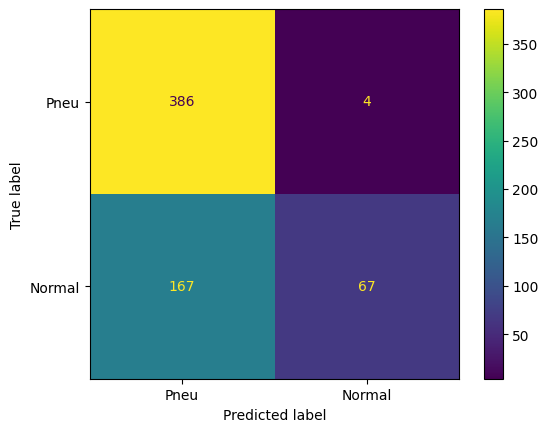

In [16]:
###### matriz de confusión test
pred_test=(fc_model.predict(x_test) > 0.50).astype('int')
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Pneu', 'Normal'])
disp.plot()

print(metrics.classification_report(y_test, pred_test))





In [18]:


#################### exportar red ##############
# guardar modelo

fc_model.save('salidas/model.keras')